In [1]:
import numpy as np
from skimage.io import imread, imshow, imsave
from skimage.util import crop
import matplotlib.pylab as plt
import matplotlib.patches as patches

In [8]:
# Define some parameters
n_width = 5
n_height = 7

width = 60
height = 60

# the distance between each cropping windows in vertical direction
margin = 25

image_A = imread('str515_229_raff2_to_gal2_various_exposures_4V_00_str515_GFP_007_tp000001_Brightfield_002.jpg')
mask_A = imread('str515_229_raff2_to_gal2_various_exposures_4V_00_str515_GFP_007_tp000001_Brightfield_002.png')

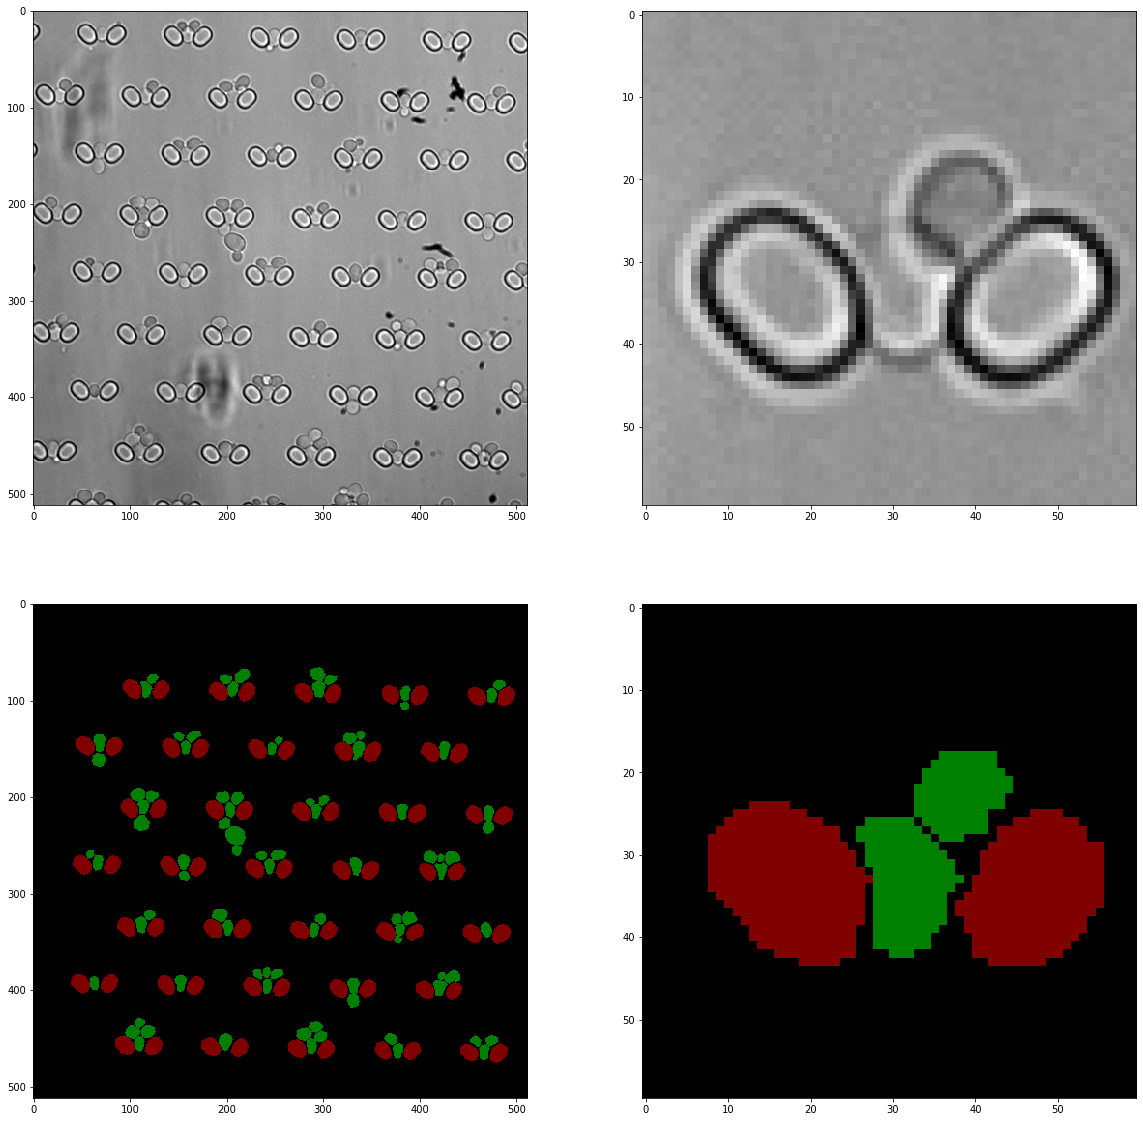

In [13]:
# Try some cropping in both horizontal and vertical directions
start_Y = 55
start_X = 85

image_B = image_A[start_Y:start_Y+height, start_X:start_X+width, :]
mask_B = mask_A[start_Y:start_Y+height, start_X:start_X+width, :]

plt.figure(figsize=(20,20))
plt.subplot(221), plt.imshow(image_A)
plt.subplot(222), plt.imshow(image_B) #, plt.axis('off')
plt.subplot(223), plt.imshow(mask_A)
plt.subplot(224), plt.imshow(mask_B) #, plt.axis('off')

plt.show()

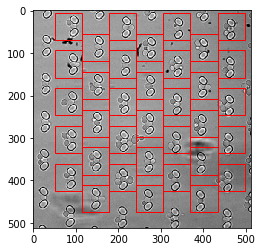

In [185]:
# Visualize the cropping windows with bounding boxes

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(A)

'''
# Create a Rectangle patch
rect = patches.Rectangle((50,100),40,30,linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)

rect = patches.Rectangle((50,200),40,30,linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
'''
for x in range(n_width):
    for y in range(n_height):
        if (x%2)!=0:
            rect = patches.Rectangle((50+width*x,55+height*y+margin*y),width,height,linewidth=1,edgecolor='r',facecolor='none')
            # B[40+height*y+b*y:40+height*(y+1)+b*y,width*x:width*(x+1),:]
        else:
            rect = patches.Rectangle((50+width*x,5+height*y+margin*y),width,height,linewidth=1,edgecolor='r',facecolor='none')
            # B[height*y+b*y:height*(y+1)+b*y,width*x:width*(x+1),:]
        ax.add_patch(rect)

#plt.axis('off')
#plt.imsave('rec.png', ax)
plt.show()

#imsave('rec2.png', ax)

In [186]:
# Cropping and save the result into 'mask'
mask = np.ndarray(shape = (35,64,64,3))
for x in range(n_width):
    for y in range(n_height):
        if (x%2)!=0:
            mask[x*n_height+y] = B[50+height*y+margin*y:50+height*(y+1)+margin*y,width*x:width*(x+1),:]
        else:
            mask[x*n_height+y] = B[height*y+margin*y:height*(y+1)+margin*y,width*x:width*(x+1),:]
            
mask = mask.astype('uint8')

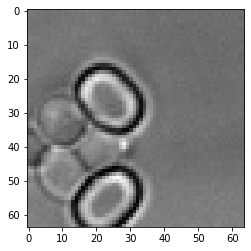

In [187]:
# Sanity test
plt.figure()
plt.imshow(mask[34])
plt.show()

In [188]:
# Save cropped masks
for n in range(len(mask)):
    imsave('str515_229_raff2_to_gal2_various_exposures_4V_00_str515_GFP_007_tp000001_Brightfield_002_'+str(n)+'.png', mask[n])